# Verify Snap

A way to check if the new generated snap files agree with the old ones.

In [1]:
library(SnapATAC)
library(GenomicRanges)
library(ggplot2) 

# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_snATAC
# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_brain_5k

Loading required package: Matrix

Loading required package: rhdf5

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:SnapATAC’:

    colMeans, colSums, rowMeans, rowSums


The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapp

In [182]:
x.sp.old = createSnap(file = "/srv/scratch/surag/scATAC-reprog/snap/D2.snap",                      
                     sample = "old")

Epoch: reading the barcode session ...



In [183]:
x.sp.new = createSnap(file = "/srv/scratch/surag/scATAC-reprog/mysnap/D2.snap",
                     sample = "new")

Epoch: reading the barcode session ...



In [184]:
barcodes = read.table("../20200122_snapATAC/barcodeLists/20200123_5kb_logcov_gt3_promratio_bw_0.2_0.8/D2.barcodes.txt")[,1]
head(barcodes)

[1] AAACAACGAAACTAGA AAACAACGAAATCTGC AAACAACGAAGGTAAT AAACAACGAGAAGTTA
[5] AAACAACGAGACTGTT AAACAACGAGCGTATT
9817 Levels: AAACAACGAAACTAGA AAACAACGAAATCTGC ... TTTGGGATGTTTCTGT

In [185]:
x.sp.old  = x.sp.old[x.sp.old@barcode %in% barcodes,];
x.sp.new  = x.sp.new[x.sp.new@barcode %in% barcodes,];

In [186]:
x.sp.new
x.sp.old

number of barcodes: 9817
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

number of barcodes: 9817
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

In [187]:
# if not common ones, then restrict x.sp.old
x.sp.old = x.sp.old[x.sp.old@barcode %in% x.sp.new@barcode, ]
x.sp.old

number of barcodes: 9817
number of bins: 0
number of genes: 0
number of peaks: 0
number of motifs: 0

In [188]:
x.sp.old = addBmatToSnap(x.sp.old, bin.size=5000, num.cores=5)

Epoch: reading cell-bin count matrix session ...



In [189]:
x.sp.new = addBmatToSnap(x.sp.new, bin.size=5000, num.cores=5)

Epoch: reading cell-bin count matrix session ...



In [190]:
x.sp.old
x.sp.new

number of barcodes: 9817
number of bins: 620094
number of genes: 0
number of peaks: 0
number of motifs: 0

number of barcodes: 9817
number of bins: 620094
number of genes: 0
number of peaks: 0
number of motifs: 0

In [191]:
all(x.sp.new@barcode==x.sp.old@barcode)

[1] TRUE

In [192]:
x.sp.old = makeBinary(x.sp.old, mat="bmat");
x.sp.new = makeBinary(x.sp.new, mat="bmat");

In [193]:
x.sp.new.shuf = x.sp.new[sample(length(x.sp.new@barcode)),]

In [194]:
rsold = Matrix::rowSums(x.sp.old@bmat)
rsnew = Matrix::rowSums(x.sp.new@bmat)
rsnsh = Matrix::rowSums(x.sp.new.shuf@bmat)

In [195]:
cor(rsold, rsnew)
cor(rsold, rsnsh)

[1] 0.999847

[1] 0.001473884

In [196]:
# jaccard similarities for x.sp.old and x.sp.new
inter = Matrix::rowSums(x.sp.new@bmat * x.sp.old@bmat)
jacs = inter/(rsnew+rsold-inter)

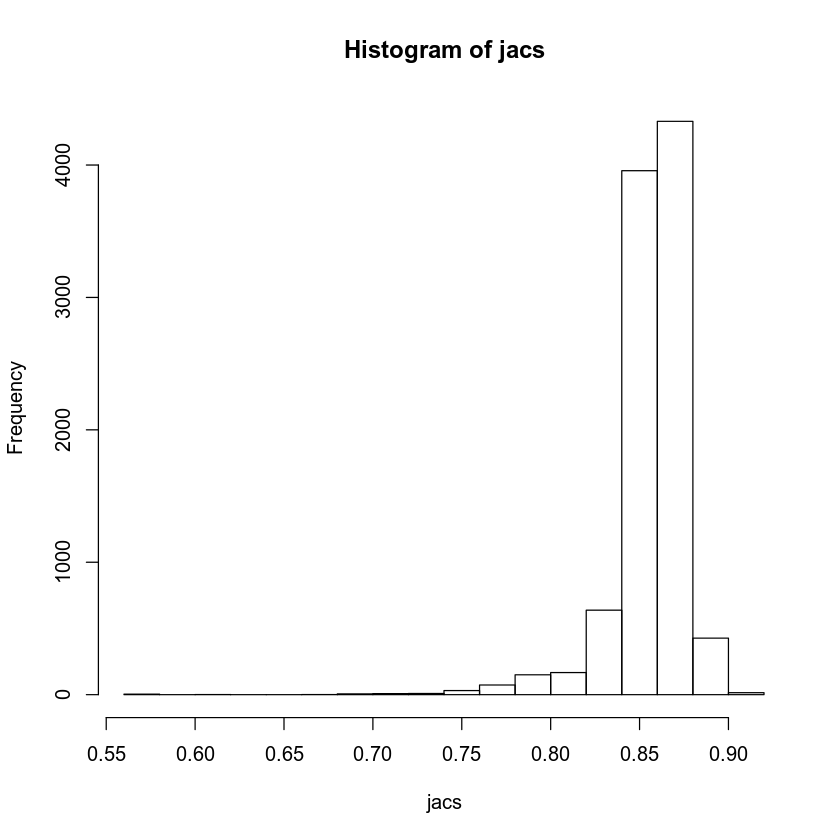

In [197]:
hist(jacs)

In [198]:
min(jacs)

[1] 0.573056

In [199]:
# jaccard similarities for x.sp.old and x.sp.new.shuf
inter_shuf = Matrix::rowSums(x.sp.new.shuf@bmat * x.sp.old@bmat)
jacs_shuf = inter_shuf/(rsnsh+rsold-inter_shuf)

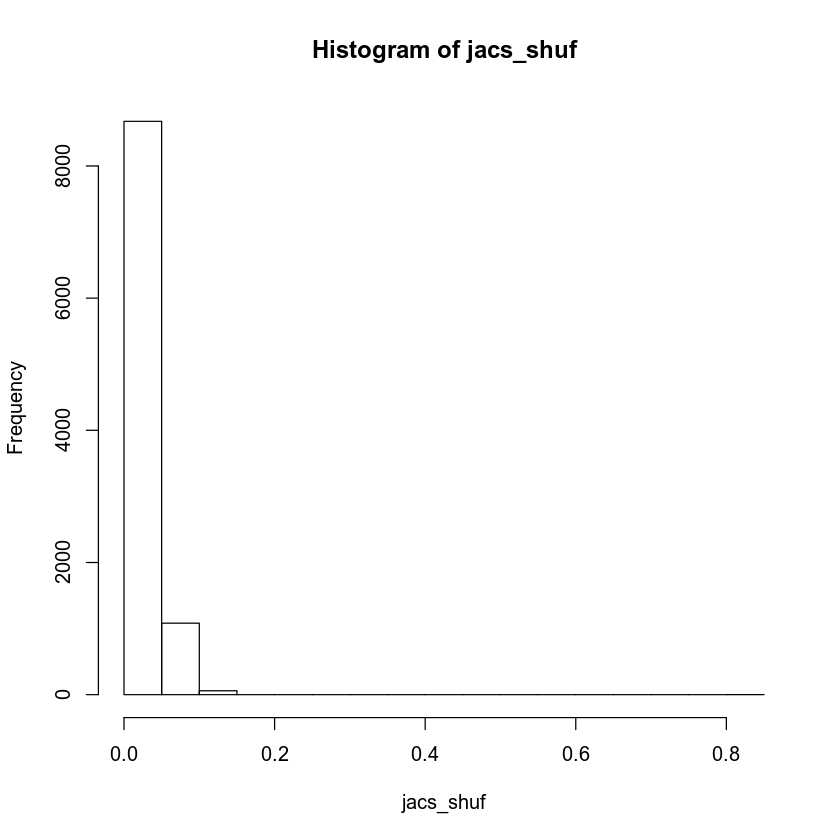

In [200]:
hist(jacs_shuf)

In [201]:
max(jacs_shuf)

[1] 0.8495973